In [1]:
from dataloaders.classication_dataset import get_data_loaders as get_classif_data_loaders
from dataloaders.segmentation_dataset import get_data_loaders as get_seg_data_loaders

from architectures.simple_CNN import SimpleCNN, train_model as train_classif_model
from architectures.unet import Unet, train_model as train_seg_model

import utils.utils as utils
from utils.gradcamplpl import gradcamplpl_mask

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image

if not torch.cuda.is_available():
    raise RuntimeError("GPU is not available, good luck.")
for i in range(torch.cuda.device_count()):
   print(f"'cuda:{i}' is: {torch.cuda.get_device_properties(i).name}")
cuda_device = "cuda:1"

# Seed to ensure train val test are split the same way for classification and segmentation dataloaders
split_seed = 777

'cuda:0' is: Quadro RTX 6000
'cuda:1' is: Quadro RTX 6000
'cuda:2' is: Quadro RTX 6000


In [2]:
classif_train_loader, classif_val_loader, classif_test_loader = get_classif_data_loaders(
    img_dir="data/PANNUKE/images",
    label_file="data/PANNUKE/labels/labels.npy",
    contiguous_ids_file="data/PANNUKE/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=32,
    val_split=0.2,
    test_split=0.1
)

In [3]:
classif_model = SimpleCNN()

Training for epoch 0: 100%|██████████| 45/45 [00:12<00:00,  3.50it/s]


Epoch 1/1000
Train loss: 0.728568865193261
Val loss: 0.6914402352439033


Training for epoch 1: 100%|██████████| 45/45 [00:12<00:00,  3.69it/s]


Epoch 2/1000
Train loss: 0.6927621708975897
Val loss: 0.6824254565768771


Training for epoch 2: 100%|██████████| 45/45 [00:11<00:00,  3.93it/s]


Epoch 3/1000
Train loss: 0.6836489703920152
Val loss: 0.6401891575919257


Training for epoch 3: 100%|██████████| 45/45 [00:11<00:00,  3.80it/s]


Epoch 4/1000
Train loss: 0.654738618267907
Val loss: 0.5929027305708992


Training for epoch 4: 100%|██████████| 45/45 [00:11<00:00,  3.80it/s]


Epoch 5/1000
Train loss: 0.6561103893650903
Val loss: 0.6290739059448243
No progress on val loss was made, patience reduced to 4.


Training for epoch 5: 100%|██████████| 45/45 [00:11<00:00,  3.85it/s]


Epoch 6/1000
Train loss: 0.6293165981769562
Val loss: 0.5912233922216628
Progress on val loss was inferior to 0.005, patience reduced to 3.


Training for epoch 6: 100%|██████████| 45/45 [00:12<00:00,  3.69it/s]


Epoch 7/1000
Train loss: 0.6427103824085659
Val loss: 0.5690560142199198


Training for epoch 7: 100%|██████████| 45/45 [00:12<00:00,  3.75it/s]


Epoch 8/1000
Train loss: 0.6064889285299513
Val loss: 0.6235123541620042
No progress on val loss was made, patience reduced to 4.


Training for epoch 8: 100%|██████████| 45/45 [00:11<00:00,  3.96it/s]


Epoch 9/1000
Train loss: 0.5896777404679192
Val loss: 0.49514952103296916


Training for epoch 9: 100%|██████████| 45/45 [00:12<00:00,  3.68it/s]


Epoch 10/1000
Train loss: 0.5552747037675646
Val loss: 0.5062222361564637
No progress on val loss was made, patience reduced to 4.


Training for epoch 10: 100%|██████████| 45/45 [00:12<00:00,  3.66it/s]


Epoch 11/1000
Train loss: 0.5331268827120463
Val loss: 0.5021040187941657
No progress on val loss was made, patience reduced to 3.


Training for epoch 11: 100%|██████████| 45/45 [00:11<00:00,  3.79it/s]


Epoch 12/1000
Train loss: 0.535043861468633
Val loss: 0.4923066920704312
Progress on val loss was inferior to 0.005, patience reduced to 2.


Training for epoch 12: 100%|██████████| 45/45 [00:12<00:00,  3.74it/s]


Epoch 13/1000
Train loss: 0.5386326458719042
Val loss: 0.46315780613157487


Training for epoch 13: 100%|██████████| 45/45 [00:12<00:00,  3.66it/s]


Epoch 14/1000
Train loss: 0.549009860224194
Val loss: 0.519916648334927
No progress on val loss was made, patience reduced to 4.


Training for epoch 14: 100%|██████████| 45/45 [00:11<00:00,  3.90it/s]


Epoch 15/1000
Train loss: 0.5117862396770053
Val loss: 0.48855062060885956
No progress on val loss was made, patience reduced to 3.


Training for epoch 15: 100%|██████████| 45/45 [00:11<00:00,  3.79it/s]


Epoch 16/1000
Train loss: 0.496688359313541
Val loss: 0.4601856655544705
Progress on val loss was inferior to 0.005, patience reduced to 2.


Training for epoch 16: 100%|██████████| 45/45 [00:12<00:00,  3.61it/s]


Epoch 17/1000
Train loss: 0.5009954717424181
Val loss: 0.4889871915181478
No progress on val loss was made, patience reduced to 1.


Training for epoch 17: 100%|██████████| 45/45 [00:11<00:00,  3.86it/s]


Epoch 18/1000
Train loss: 0.5159678532017602
Val loss: 0.44793752564324274


Training for epoch 18: 100%|██████████| 45/45 [00:11<00:00,  3.87it/s]


Epoch 19/1000
Train loss: 0.4888122684425778
Val loss: 0.48860066069497005
No progress on val loss was made, patience reduced to 4.


Training for epoch 19: 100%|██████████| 45/45 [00:12<00:00,  3.74it/s]


Epoch 20/1000
Train loss: 0.5044423043727875
Val loss: 0.43088892433378434


Training for epoch 20: 100%|██████████| 45/45 [00:11<00:00,  3.75it/s]


Epoch 21/1000
Train loss: 0.5001924422052172
Val loss: 0.4656137850549486
No progress on val loss was made, patience reduced to 4.


Training for epoch 21: 100%|██████████| 45/45 [00:11<00:00,  3.82it/s]


Epoch 22/1000
Train loss: 0.4837174031469557
Val loss: 0.4601778282059564
No progress on val loss was made, patience reduced to 3.


Training for epoch 22: 100%|██████████| 45/45 [00:11<00:00,  3.82it/s]


Epoch 23/1000
Train loss: 0.4605095320277744
Val loss: 0.4502944376733568
No progress on val loss was made, patience reduced to 2.


Training for epoch 23: 100%|██████████| 45/45 [00:11<00:00,  3.86it/s]


Epoch 24/1000
Train loss: 0.46680726541413203
Val loss: 0.4292964776357015
Progress on val loss was inferior to 0.005, patience reduced to 1.


Training for epoch 24: 100%|██████████| 45/45 [00:11<00:00,  3.76it/s]


Epoch 25/1000
Train loss: 0.44252900746133594
Val loss: 0.42812407943937514
Progress on val loss was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 0.0001.


Training for epoch 25: 100%|██████████| 45/45 [00:11<00:00,  3.83it/s]


Epoch 26/1000
Train loss: 0.3997119966480467
Val loss: 0.40889718797471786


Training for epoch 26: 100%|██████████| 45/45 [00:11<00:00,  3.89it/s]


Epoch 27/1000
Train loss: 0.400735138853391
Val loss: 0.4192476828893026
No progress on val loss was made, patience reduced to 4.


Training for epoch 27: 100%|██████████| 45/45 [00:11<00:00,  3.77it/s]


Epoch 28/1000
Train loss: 0.4088307910495334
Val loss: 0.41618909173541596
No progress on val loss was made, patience reduced to 3.


Training for epoch 28: 100%|██████████| 45/45 [00:11<00:00,  3.77it/s]


Epoch 29/1000
Train loss: 0.39884552160898845
Val loss: 0.42994646231333417
No progress on val loss was made, patience reduced to 2.


Training for epoch 29: 100%|██████████| 45/45 [00:11<00:00,  3.98it/s]


Epoch 30/1000
Train loss: 0.38976580103238423
Val loss: 0.40968719455930924
No progress on val loss was made, patience reduced to 1.


Training for epoch 30: 100%|██████████| 45/45 [00:11<00:00,  3.86it/s]


Epoch 31/1000
Train loss: 0.3819149523973465
Val loss: 0.4036665611796909


Training for epoch 31: 100%|██████████| 45/45 [00:12<00:00,  3.74it/s]


Epoch 32/1000
Train loss: 0.37813453177611034
Val loss: 0.4514968090587192
No progress on val loss was made, patience reduced to 4.


Training for epoch 32: 100%|██████████| 45/45 [00:11<00:00,  3.80it/s]


Epoch 33/1000
Train loss: 0.39215378860632577
Val loss: 0.4118499543931749
No progress on val loss was made, patience reduced to 3.


Training for epoch 33: 100%|██████████| 45/45 [00:11<00:00,  3.80it/s]


Epoch 34/1000
Train loss: 0.38258674343427024
Val loss: 0.3889654874801636


Training for epoch 34: 100%|██████████| 45/45 [00:11<00:00,  3.80it/s]


Epoch 35/1000
Train loss: 0.3822822782728407
Val loss: 0.41120896074506974
No progress on val loss was made, patience reduced to 4.


Training for epoch 35: 100%|██████████| 45/45 [00:11<00:00,  3.90it/s]


Epoch 36/1000
Train loss: 0.3741854512029224
Val loss: 0.4212461272875468
No progress on val loss was made, patience reduced to 3.


Training for epoch 36: 100%|██████████| 45/45 [00:11<00:00,  3.78it/s]


Epoch 37/1000
Train loss: 0.3801819771528244
Val loss: 0.4162073837386237
No progress on val loss was made, patience reduced to 2.


Training for epoch 37: 100%|██████████| 45/45 [00:11<00:00,  3.77it/s]


Epoch 38/1000
Train loss: 0.37442056470447116
Val loss: 0.399706776936849
No progress on val loss was made, patience reduced to 1.


Training for epoch 38: 100%|██████████| 45/45 [00:11<00:00,  3.85it/s]


Epoch 39/1000
Train loss: 0.37106889883677163
Val loss: 0.40678839683532714
No progress on val loss was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1e-05.


Training for epoch 39: 100%|██████████| 45/45 [00:11<00:00,  3.82it/s]


Epoch 40/1000
Train loss: 0.36397466593318517
Val loss: 0.4134653104676141
No progress on val loss was made, patience reduced to 4.


Training for epoch 40: 100%|██████████| 45/45 [00:11<00:00,  3.89it/s]


Epoch 41/1000
Train loss: 0.3574464976787567
Val loss: 0.4108667267693414
No progress on val loss was made, patience reduced to 3.


Training for epoch 41: 100%|██████████| 45/45 [00:11<00:00,  3.98it/s]


Epoch 42/1000
Train loss: 0.35934329993195
Val loss: 0.4038139303525289
No progress on val loss was made, patience reduced to 2.


Training for epoch 42: 100%|██████████| 45/45 [00:11<00:00,  3.79it/s]


Epoch 43/1000
Train loss: 0.37036544614368017
Val loss: 0.4224182102415297
No progress on val loss was made, patience reduced to 1.


Training for epoch 43: 100%|██████████| 45/45 [00:11<00:00,  3.80it/s]


Epoch 44/1000
Train loss: 0.3649270405371984
Val loss: 0.41147791809505885
No progress on val loss was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1.0000000000000002e-06.


Training for epoch 44: 100%|██████████| 45/45 [00:11<00:00,  3.86it/s]


Epoch 45/1000
Train loss: 0.3679489082760281
Val loss: 0.4189778513378567
No progress on val loss was made, patience reduced to 4.


Training for epoch 45: 100%|██████████| 45/45 [00:12<00:00,  3.70it/s]


Epoch 46/1000
Train loss: 0.36964703069792854
Val loss: 0.3862074746025933
Progress on val loss was inferior to 0.005, patience reduced to 3.


Training for epoch 46: 100%|██████████| 45/45 [00:12<00:00,  3.71it/s]


Epoch 47/1000
Train loss: 0.3674684206644694
Val loss: 0.4208894107076857
No progress on val loss was made, patience reduced to 2.


Training for epoch 47: 100%|██████████| 45/45 [00:11<00:00,  3.81it/s]


Epoch 48/1000
Train loss: 0.3671031766467624
Val loss: 0.4182668381267124
No progress on val loss was made, patience reduced to 1.


Training for epoch 48: 100%|██████████| 45/45 [00:11<00:00,  3.82it/s]


Epoch 49/1000
Train loss: 0.36577215161588456
Val loss: 0.3938630673620436
No progress on val loss was made, patience reduced to 0.
Best val loss: 0.3862074746025933
Stopping training.


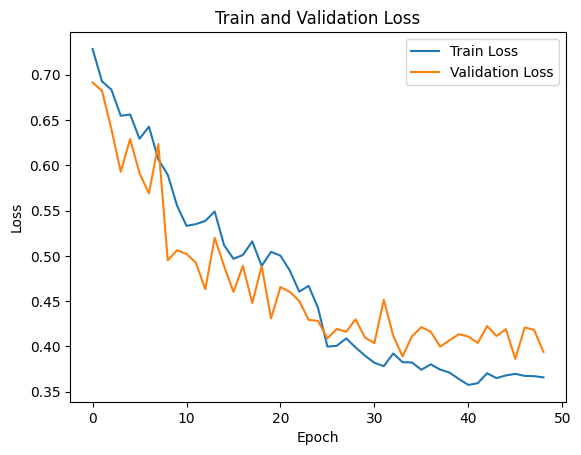

In [4]:
train_classif_model(classif_model, classif_train_loader, classif_val_loader, cuda_device, learning_rate=0.001)

In [5]:
trained_model_path = "models/simple_CNN_38"
classif_model = SimpleCNN()
classif_model.load_state_dict(torch.load(trained_model_path, weights_only=True))
classif_model.eval()
classif_model.to(torch.device(cuda_device))

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_run

Accuracy on test set: 76.50%


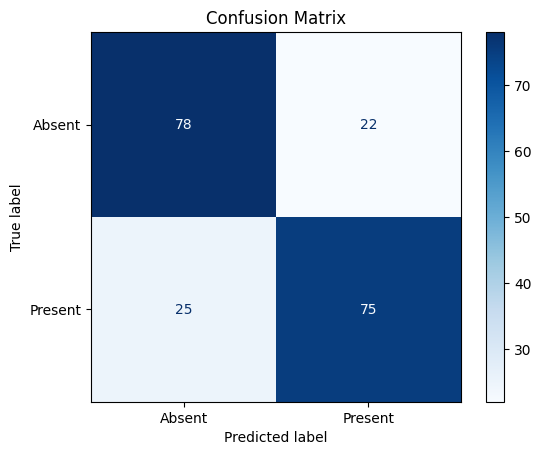

In [6]:
classif_model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
device = torch.device(cuda_device)
all_predictions = []
all_labels = []
all_inputs_tensors = []

    
# Disabling gradient calculation for evaluation
with torch.no_grad():
    for inputs, labels, _ in classif_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = classif_model(inputs)

        # Get predicted class (the one with the highest score)
        _, predicted = torch.max(outputs, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_labels.append(labels.cpu().numpy())
        all_predictions.append(predicted.cpu().numpy())
        all_inputs_tensors.append(inputs.cpu().numpy())

# Flatten the lists to arrays
all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)
all_inputs_tensors = np.concatenate(all_inputs_tensors)

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

cm = confusion_matrix(all_labels, all_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absent', 'Present'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [7]:
# Get the ids of all the images
img_names = os.listdir("data/PANNUKE/images")
all_ids = set()
for name in img_names:
    # The images should be named like 1.npy
    digit = name.split('.')[0]
    # Check the name of the file is a digit because sometimes config files are hidden in folders (if not don't use)
    if digit.isdigit():
        all_ids.add(int(digit))

In [8]:
target_layer = classif_model.conv6
grad_maps = []

for _id in tqdm(all_ids):
    img_path = f"data/PANNUKE/images/{_id}.png"
    path_map = f"CAM_outputs/grayscale_maps/{_id}.npy"
    grayscale_map = gradcamplpl_mask(classif_model, target_layer, img_path, cuda_device)
    np.save(path_map, grayscale_map)

  1%|▏         | 25/2000 [06:20<8:20:36, 15.21s/it]


KeyboardInterrupt: 

In [5]:
# Now, we can generate centroids from the heatmap. The assumption is that those centroids are on the target cells.
for _id in all_ids:
    grayscale_map = np.load(f"CAM_outputs/grayscale_maps/{_id}.npy")
    centroid_map = utils.get_centroids(grayscale_map)
    path_centroid_map = f"CAM_outputs/centroid_maps/{_id}.npy"
    np.save(path_centroid_map, centroid_map)

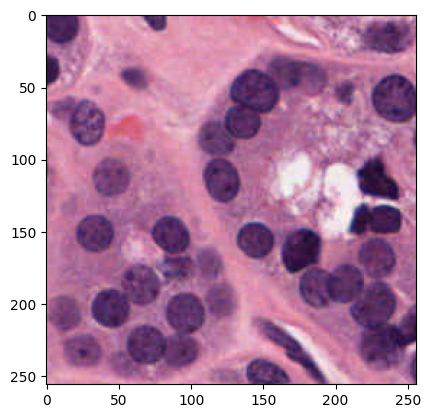

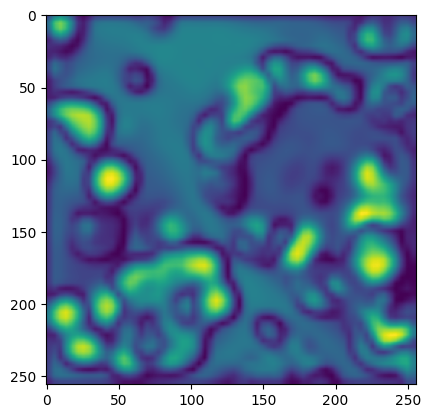

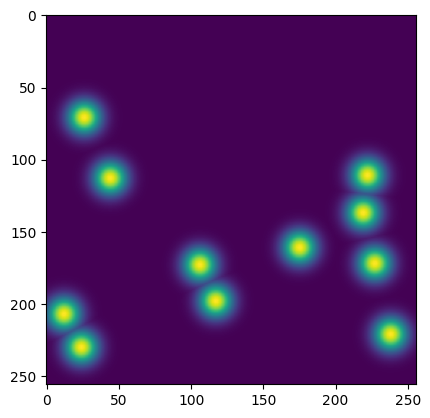

In [4]:
plt.imshow(Image.open(f"data/PANNUKE/images/{2560}.png").convert('RGB'))
plt.show()
plt.imshow(np.load(f"CAM_outputs/grayscale_maps/{2560}.npy"))
plt.show()
plt.imshow(np.load(f"CAM_outputs/centroid_maps/{2560}.npy"))
plt.show()

In [3]:
seg_model = Unet()
seg_train_loader, seg_val_loader, seg_test_loader = get_seg_data_loaders(
    img_dir="data/PANNUKE/images",
    mask_dir="data/PANNUKE/masks",
    contiguous_ids_file="data/PANNUKE/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

In [4]:
train_seg_model(seg_model, seg_train_loader, seg_val_loader, cuda_device, learning_rate=0.001)

Training for epoch 0:  54%|█████▍    | 49/90 [00:23<00:19,  2.09it/s]


KeyboardInterrupt: 